In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
from google.colab import drive

drive.mount('/content/gdrive')
df = pd.read_csv("gdrive/My Drive/Dissertation Complete/textblob_results.csv")

df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,content,university,textblob_predicted_sentiment
0,"Hey, Thanks so much for the response! I actual...",UNC,positive
1,"I thought school was to learn, get involved, a...",UVA,positive
2,Seems kind of late for you to be so utterly un...,Georgetown,positive
3,Do you have outside scholarship money? You sho...,Georgetown,positive
4,Cal engineering is probably the best choice as...,Georgetown,positive


In [28]:
df["textblob_predicted_sentiment"].value_counts()

positive    265157
neutral     154310
negative     25155
Name: textblob_predicted_sentiment, dtype: int64

In [29]:
# Count sentiment types for each uni
sentiment_totals = df.groupby('university')['textblob_predicted_sentiment'].value_counts().unstack().fillna(0)
sentiment_totals = sentiment_totals.rename_axis([None], axis=1).reset_index()

# convert to int and sort by positive
sentiment_totals[["negative", "neutral", "positive"]] = sentiment_totals[["negative", "neutral", "positive"]].astype('int64')
sentiment_totals = sentiment_totals.sort_values(by=['positive'], ascending=False)

# Reset Index
sentiment_totals = sentiment_totals.reset_index(drop=True)

sentiment_totals.tail()

,university,negative,neutral,positive
40,Case Western Reserve University,4,52,62
41,Rensselaer Polytechnic Institute,2,24,36
42,Georgia Institute of Technology,1,34,18
43,College of William & Mary,0,5,8
44,University of California--San Diego,0,1,1


In [30]:
# Create total amount of entries, with percentages of each type, to 2 DP.
sentiment_totals['total'] = sentiment_totals['positive'] + sentiment_totals['negative'] + sentiment_totals['neutral']

sentiment_totals['positive %'] = (sentiment_totals['positive'] / sentiment_totals['total']) * 100
sentiment_totals['negative %'] = (sentiment_totals['negative'] / sentiment_totals['total']) * 100
sentiment_totals['neutral %'] = (sentiment_totals['neutral'] / sentiment_totals['total']) * 100
sentiment_totals = sentiment_totals.round(2)

# Drop all unis with under 100 entries (low sample size)
sentiment_totals = sentiment_totals[sentiment_totals["total"] > 99]

# Sort by positive % in relation to total tweets per uni
sentiment_totals = sentiment_totals.sort_values(by=['positive %'], ascending=False)
sentiment_totals = sentiment_totals.reset_index(drop=True)

sentiment_totals.head()

,university,negative,neutral,positive,total,positive %,negative %,neutral %
0,Tulane,647,4698,10497,15842,66.26,4.08,29.66
1,Lehigh,219,1478,3213,4910,65.44,4.46,30.10
2,Rochester,149,1034,2174,3357,64.76,4.44,30.80
3,Tufts,630,3766,7879,12275,64.19,5.13,30.68
4,Pepperdine,39,256,518,813,63.71,4.80,31.49


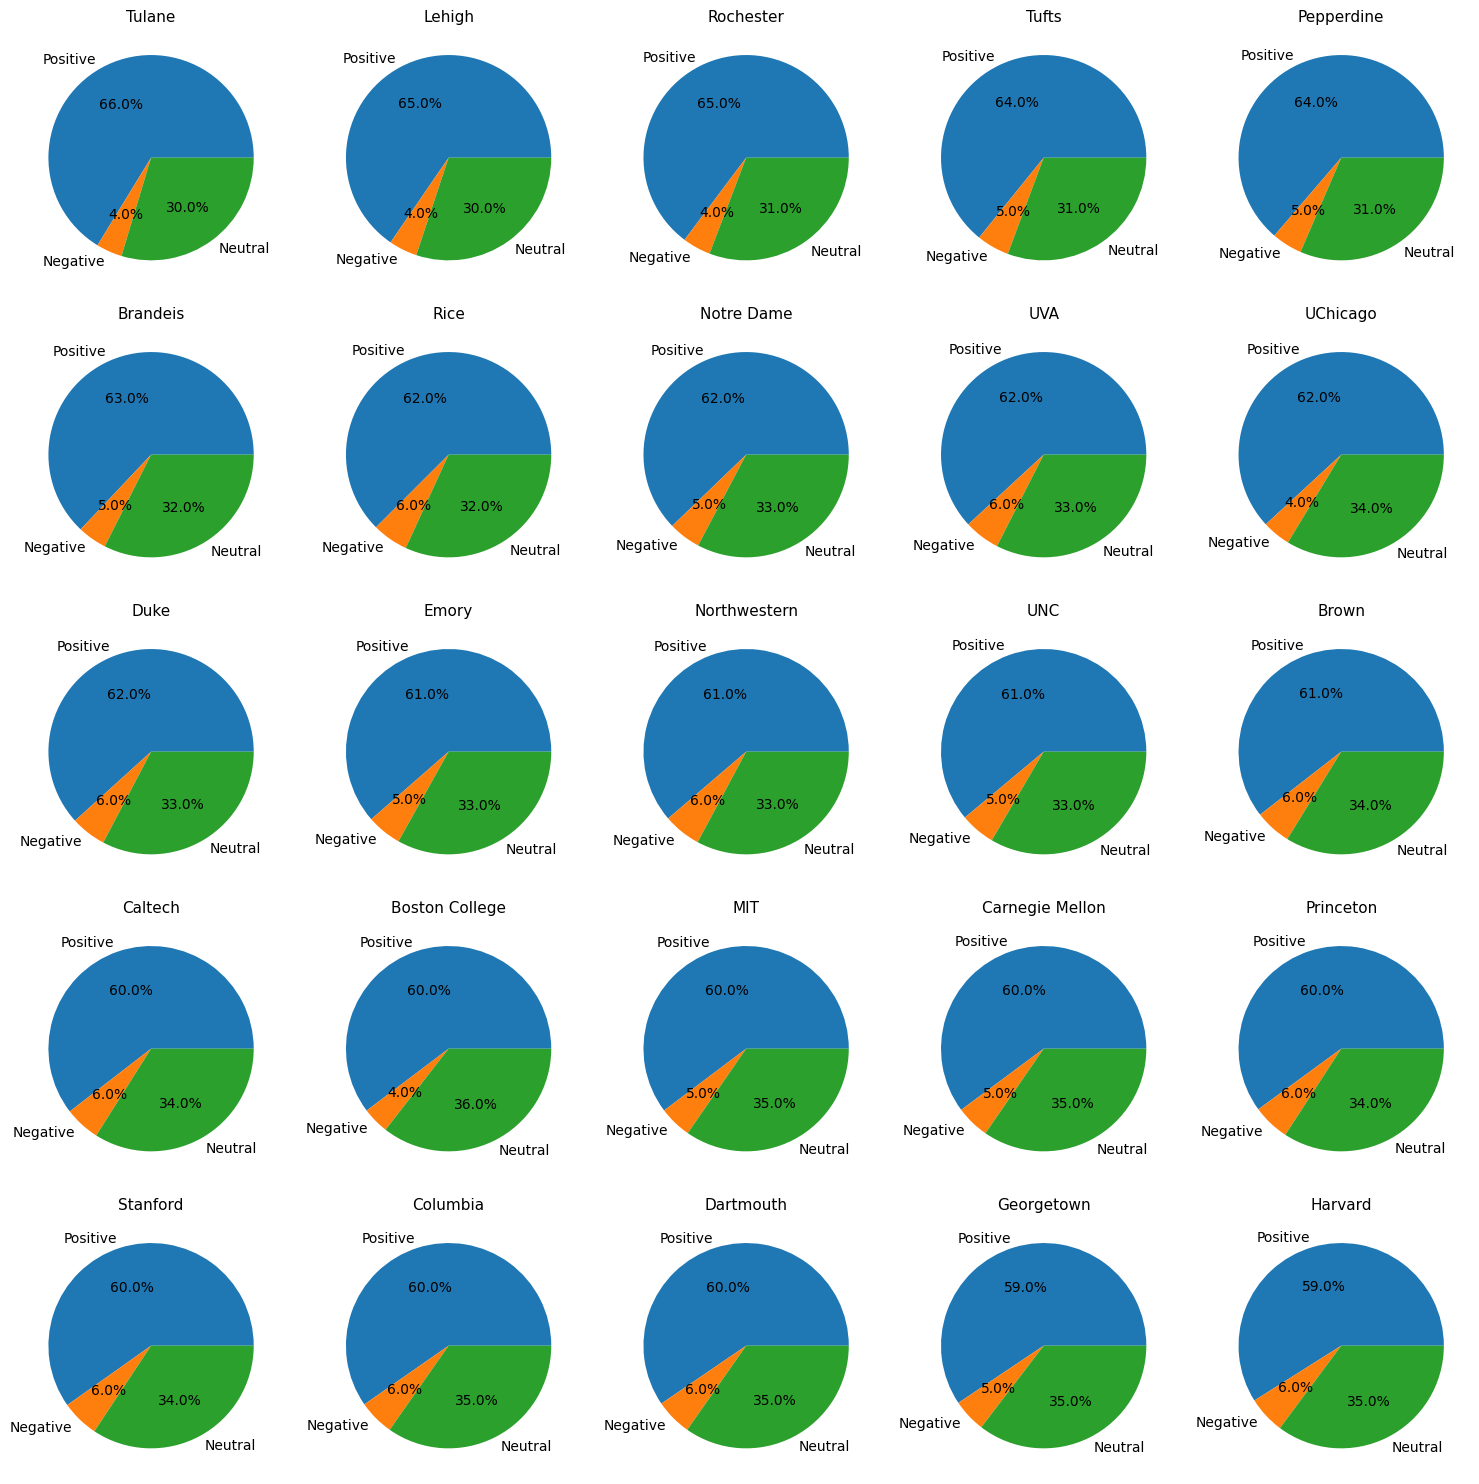

In [31]:
# Plot all universities, edit figsize to account for more or less after .shape the df.
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(15, 15))

for uni,ax in zip(sentiment_totals.index, axs.flat):
  uni_name = sentiment_totals['university'].loc[uni]
  pos = sentiment_totals['positive'].loc[uni]
  neg = sentiment_totals['negative'].loc[uni]
  neu = sentiment_totals['neutral'].loc[uni]

  positive = "Positive"
  if pos == 0:
    positive = ""

  neutral = "Neutral"
  if neu == 0:
    neutral = ""

  negative = "Negative"
  if neg == 0:
    negative = ""

  # Plot a pie chart for the sentiments, labels equal a conditional that displays if there are more than 0.
  ax.pie([pos, neg, neu], labels=[positive, negative, neutral], autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '')
  ax.set_title(f'{uni_name}', fontsize=11)

# Turn off empty plots in the grid and set layout format.
#axs[4,3].set_axis_off()
fig.tight_layout()

In [32]:
sentiment_totals.head()

,university,negative,neutral,positive,total,positive %,negative %,neutral %
0,Tulane,647,4698,10497,15842,66.26,4.08,29.66
1,Lehigh,219,1478,3213,4910,65.44,4.46,30.10
2,Rochester,149,1034,2174,3357,64.76,4.44,30.80
3,Tufts,630,3766,7879,12275,64.19,5.13,30.68
4,Pepperdine,39,256,518,813,63.71,4.80,31.49


In [33]:
final_ratings = sentiment_totals[["university", "positive %"]]
final_ratings = final_ratings.sort_values(by=['positive %'], ascending=False)

final_ratings = final_ratings.reset_index(drop=True)

final_ratings.head(50)

,university,positive %
0,Tulane,66.26
1,Lehigh,65.44
2,Rochester,64.76
3,Tufts,64.19
4,Pepperdine,63.71
5,Brandeis,62.97
6,Rice,62.50
7,Notre Dame,62.20
8,UVA,61.87
9,UChicago,61.86
